In [415]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [416]:
pd.set_option('display.max_columns', None)

In [417]:
# Importando a base
df = pd.read_csv('Mens_VolleyballPlusLiga_2028_2023/Mens-Volleyball-PlusLiga-2008-2023.csv')

# Convertendo para Data
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y, %H:%M', errors='coerce')

df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,2022-10-01 14:45:00,AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,3,60.0,17.0,11.0,79.0,18,6.0,-13%,85.0,10.0,51%,25%,100,7.0,14.0,47.0,47%,26%,7.0,11,69,30,38,96,11,10,2%,61,6,45%,26%,88,7,7,45,51%,35%,14,11,1
1,2022-09-30 17:30:00,Jastrzębski Węgiel,GKS Katowice,3,0,51.0,17.0,27.0,77.0,15,4.0,-7%,54.0,4.0,55%,16%,88,4.0,1.0,43.0,48%,43%,4.0,8,48,16,16,70,16,4,-11%,62,4,50%,20%,91,8,4,43,47%,34%,1,17,0
2,2022-10-01 20:30:00,LUK Lublin,Czarni Radom,2,3,76.0,23.0,35.0,109.0,16,3.0,-9%,85.0,9.0,49%,21%,115,6.0,10.0,63.0,54%,40%,10.0,9,82,23,40,104,19,9,-5%,93,3,47%,18%,128,10,10,63,49%,33%,10,13,1
3,2022-10-02 14:45:00,Warta Zawiercie,PGE Skra Bełchatów,3,2,66.0,16.0,22.0,98.0,21,5.0,-16%,80.0,8.0,35%,12%,92,8.0,7.0,52.0,56%,40%,9.0,11,71,21,25,103,23,8,-8%,77,5,32%,9%,102,9,9,56,54%,37%,7,14,0
4,2022-10-03 17:30:00,BBTS Bielsko-Biała,Cuprum Lubin,1,3,63.0,22.0,17.0,100.0,19,7.0,-7%,77.0,12.0,40%,23%,97,5.0,10.0,48.0,49%,34%,8.0,10,80,30,32,103,26,12,-8%,81,7,45%,22%,109,7,8,58,53%,39%,10,10,1


In [418]:
# Filtrando a base para ter dados a partir de 2020
df = df.loc[df['Date'].dt.year >= 2020]

In [419]:
# Tirando os % das colunas de percentual
perc_cols = [
    'T1_Srv_Eff', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Kill_Perc', 
    'T1_Att_Eff', 'T1_Att_Sum', 'T2_Srv_Eff', 'T2_Rec_Pos', 'T2_Rec_Perf', 
    'T2_Att_Kill_Perc', 'T2_Att_Eff', 'T2_Att_Sum'
]
for col in perc_cols:
    df[col] = pd.to_numeric(df[col].str.replace('%', ''))

In [420]:
# Ajustando virgulas por pontos nas colunas de float
float_cols = ['T1_Srv_Err', 'T1_Blk_As', 'T2_Srv_Err', 'T2_Blk_As']
for col in float_cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

In [421]:
# Ordenando a base por Data e resetando os index
df.sort_values('Date', ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)

df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,49,23,32,73,10,7,1,38,0,47,15,67,2,5,34,50,40,8,7,1
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,68,27,17,101,25,5,-16,81,8,59,32,110,9,9,56,50,34,7,17,0
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,71,20,33,100,20,4,-11,79,4,48,30,113,7,7,60,53,40,7,11,1
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,62,24,37,75,9,5,-4,58,3,48,22,90,7,6,47,52,37,10,12,1
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,66,26,36,95,9,8,1,68,5,61,38,98,11,5,49,50,33,9,14,1


In [422]:
mapeamento_colunas = {
    'Team_1': 'T1', 
    'Team_2': 'T2',
    'T1_Score': 'T1_SetsVencidos',
    'T2_Score': 'T2_SetsVencidos',
    'T1_Sum': 'T1_PontuacaoFinal',
    'T1_BP': 'T1_PontosCAProprioSaque', # Pontos marcados em um contra-ataque no seu próprio saque
    'T1_Ratio': 'T1_PontosRatio', # Pontos ganhos / Pontos perdidos
    'T1_Srv_Sum': 'T1_TotalSaques',
    'T1_Srv_Err': 'T1_TotalSaquesErrados',
    'T1_Srv_Ace': 'T1_PontosDeAce', #6
    'T1_Srv_Eff': 'T1_PercEficienciaSaque', # Entender como isso foi calculado.
    'T1_Rec_Sum': 'T1_TotalSaquesRecebidos',
    'T1_Rec_Err': 'T1_TotalSaquesNaoRecebidos',
    'T1_Rec_Pos': 'T1_PercSaquesRecebidos',# Percent of postive serve receptions
    'T1_Rec_Perf': 'T1_PercDeSaquesRecebidosPerfeitos', # Percent of perfect serve receptions
    'T1_Att_Sum': 'T1_TotalAtaques',
    'T1_Att_Err': 'T1_TotalAtaquesErrados',
    'T1_Att_Blk': 'T1_TotalAtaquesBloqueados',
    'T1_Att_Kill': 'T1_PontosDeAtaque', # 47
    'T1_Att_Kill_Perc': 'T1_PercPontosAtaque', # 47 / 100 (T1_PontosDeAtaque/T1_TotalAtaques)
    'T1_Att_Eff': 'T1_PercEficienciaAtaque', # (T1_PontosDeAtaque - T1_TotalAtaquesBloqueados - T1_TotalAtaquesBloqueados / T1_TotalAtaques)
    'T1_Blk_Sum': 'T1_PontosDeBloqueio',
    'T1_Blk_As': 'T1_TotalDeBloqueiosCA',
    
    'T2_Sum': 'T2_PontuacaoFinal',
    'T2_BP': 'T2_PontosCAProprioSaque', # Pontos marcados em um contra-ataque no seu próprio saque
    'T2_Ratio': 'T2_PontosRatio', # Pontos ganhos / Pontos perdidos
    'T2_Srv_Sum': 'T2_TotalSaques',
    'T2_Srv_Err': 'T2_TotalSaquesErrados',
    'T2_Srv_Ace': 'T2_PontosDeAce', #6
    'T2_Srv_Eff': 'T2_PercEficienciaSaque', # Entender como isso foi calculado.
    'T2_Rec_Sum': 'T2_TotalSaquesRecebidos',
    'T2_Rec_Err': 'T2_TotalSaquesNaoRecebidos',
    'T2_Rec_Pos': 'T2_PercSaquesRecebidos',# Percent of postive serve receptions
    'T2_Rec_Perf': 'T2_PercDeSaquesRecebidosPerfeitos', # Percent of perfect serve receptions
    'T2_Att_Sum': 'T2_TotalAtaques',
    'T2_Att_Err': 'T2_TotalAtaquesErrados',
    'T2_Att_Blk': 'T2_TotalAtaquesBloqueados',
    'T2_Att_Kill': 'T2_PontosDeAtaque', # 47
    'T2_Att_Kill_Perc': 'T2_PercPontosAtaque', # 47 / 100 (T1_PontosDeAtaque/T1_TotalAtaques)
    'T2_Att_Eff': 'T2_PercEficienciaAtaque', # (T1_PontosDeAtaque - T1_TotalAtaquesBloqueados - T1_TotalAtaquesBloqueados / T1_TotalAtaques)
    'T2_Blk_Sum': 'T2_PontosDeBloqueio',
    'T2_Blk_As': 'T2_TotalDeBloqueiosCA',
    'Winner': 'Flag_Vencedor' # 0 if Team 1 won, 1 if Team 2 won
    
}
df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,Date,T1,T2,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_TotalSaquesRecebidos,T1_TotalSaquesNaoRecebidos,T1_PercSaquesRecebidos,T1_PercDeSaquesRecebidosPerfeitos,T1_TotalAtaques,T1_TotalAtaquesErrados,T1_TotalAtaquesBloqueados,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_TotalSaquesRecebidos,T2_TotalSaquesNaoRecebidos,T2_PercSaquesRecebidos,T2_PercDeSaquesRecebidosPerfeitos,T2_TotalAtaques,T2_TotalAtaquesErrados,T2_TotalAtaquesBloqueados,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_TotalDeBloqueiosCA,Flag_Vencedor
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,49,23,32,73,10,7,1,38,0,47,15,67,2,5,34,50,40,8,7,1
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,68,27,17,101,25,5,-16,81,8,59,32,110,9,9,56,50,34,7,17,0
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,71,20,33,100,20,4,-11,79,4,48,30,113,7,7,60,53,40,7,11,1
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,62,24,37,75,9,5,-4,58,3,48,22,90,7,6,47,52,37,10,12,1
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,66,26,36,95,9,8,1,68,5,61,38,98,11,5,49,50,33,9,14,1


In [423]:
# Criar a coluna 'Nome_Time_Vencedor' com base na condição em 'Flag_Vencedor'
df['Nome_Time_Vencedor'] = np.where(df['Flag_Vencedor'] == 0, df['T1'], df['T2'])

# Criar a coluna de percentual de pontos de bloqueio em relação ao total de pontos
df['T1_Perc_Bloqueio'] = (df['T1_PontosDeBloqueio'] / df['T1_PontuacaoFinal']) * 100
df['T2_Perc_Bloqueio'] = (df['T2_PontosDeBloqueio'] / df['T2_PontuacaoFinal']) * 100

df['T1_Perc_Bloqueio'] = df['T1_Perc_Bloqueio'].round(1)
df['T2_Perc_Bloqueio'] = df['T2_Perc_Bloqueio'].round(1)

df['Ano'] = pd.to_datetime(df['Date']).dt.year

df.head()

,Date,T1,T2,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_TotalSaquesRecebidos,T1_TotalSaquesNaoRecebidos,T1_PercSaquesRecebidos,T1_PercDeSaquesRecebidosPerfeitos,T1_TotalAtaques,T1_TotalAtaquesErrados,T1_TotalAtaquesBloqueados,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_TotalSaquesRecebidos,T2_TotalSaquesNaoRecebidos,T2_PercSaquesRecebidos,T2_PercDeSaquesRecebidosPerfeitos,T2_TotalAtaques,T2_TotalAtaquesErrados,T2_TotalAtaquesBloqueados,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_TotalDeBloqueiosCA,Flag_Vencedor,Nome_Time_Vencedor,T1_Perc_Bloqueio,T2_Perc_Bloqueio,Ano
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,49,23,32,73,10,7,1,38,0,47,15,67,2,5,34,50,40,8,7,1,ZAKSA Kędzierzyn-Koźle,14.3,16.3,2020
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,68,27,17,101,25,5,-16,81,8,59,32,110,9,9,56,50,34,7,17,0,Czarni Radom,12.5,10.3,2020
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,71,20,33,100,20,4,-11,79,4,48,30,113,7,7,60,53,40,7,11,1,PGE Skra Bełchatów,10.0,9.9,2020
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,62,24,37,75,9,5,-4,58,3,48,22,90,7,6,47,52,37,10,12,1,GKS Katowice,12.8,16.1,2020
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,66,26,36,95,9,8,1,68,5,61,38,98,11,5,49,50,33,9,14,1,Projekt Warszawa,8.1,13.6,2020


In [424]:
df.columns

Index(['Date', 'T1', 'T2', 'T1_SetsVencidos', 'T2_SetsVencidos',
       'T1_PontuacaoFinal', 'T1_PontosCAProprioSaque', 'T1_PontosRatio',
       'T1_TotalSaques', 'T1_TotalSaquesErrados', 'T1_PontosDeAce',
       'T1_PercEficienciaSaque', 'T1_TotalSaquesRecebidos',
       'T1_TotalSaquesNaoRecebidos', 'T1_PercSaquesRecebidos',
       'T1_PercDeSaquesRecebidosPerfeitos', 'T1_TotalAtaques',
       'T1_TotalAtaquesErrados', 'T1_TotalAtaquesBloqueados',
       'T1_PontosDeAtaque', 'T1_PercPontosAtaque', 'T1_PercEficienciaAtaque',
       'T1_PontosDeBloqueio', 'T1_TotalDeBloqueiosCA', 'T2_PontuacaoFinal',
       'T2_PontosCAProprioSaque', 'T2_PontosRatio', 'T2_TotalSaques',
       'T2_TotalSaquesErrados', 'T2_PontosDeAce', 'T2_PercEficienciaSaque',
       'T2_TotalSaquesRecebidos', 'T2_TotalSaquesNaoRecebidos',
       'T2_PercSaquesRecebidos', 'T2_PercDeSaquesRecebidosPerfeitos',
       'T2_TotalAtaques', 'T2_TotalAtaquesErrados',
       'T2_TotalAtaquesBloqueados', 'T2_PontosDeAtaque', 'T2

In [425]:
ordenacao_colunas = [
    'Ano','Date', 'T1', 'T2', 'Flag_Vencedor', 'Nome_Time_Vencedor', 'T1_SetsVencidos', 
    'T2_SetsVencidos','T1_PontuacaoFinal', 'T1_PontosCAProprioSaque', 'T1_PontosRatio',
    'T1_TotalSaques', 'T1_TotalSaquesErrados', 'T1_PontosDeAce',
    'T1_PercEficienciaSaque', 'T1_TotalSaquesRecebidos',
    'T1_TotalSaquesNaoRecebidos', 'T1_PercSaquesRecebidos',
    'T1_PercDeSaquesRecebidosPerfeitos', 'T1_TotalAtaques',
    'T1_TotalAtaquesErrados', 'T1_TotalAtaquesBloqueados',
    'T1_PontosDeAtaque', 'T1_PercPontosAtaque', 'T1_PercEficienciaAtaque',
    'T1_PontosDeBloqueio', 'T1_Perc_Bloqueio','T1_TotalDeBloqueiosCA', 'T2_PontuacaoFinal',
    'T2_PontosCAProprioSaque', 'T2_PontosRatio', 'T2_TotalSaques',
    'T2_TotalSaquesErrados', 'T2_PontosDeAce', 'T2_PercEficienciaSaque',
    'T2_TotalSaquesRecebidos', 'T2_TotalSaquesNaoRecebidos',
    'T2_PercSaquesRecebidos', 'T2_PercDeSaquesRecebidosPerfeitos',
    'T2_TotalAtaques', 'T2_TotalAtaquesErrados',
    'T2_TotalAtaquesBloqueados', 'T2_PontosDeAtaque', 'T2_PercPontosAtaque',
    'T2_PercEficienciaAtaque', 'T2_PontosDeBloqueio', 'T2_Perc_Bloqueio',
    'T2_TotalDeBloqueiosCA'
]
df = df[ordenacao_colunas]
df.head()

,Ano,Date,T1,T2,Flag_Vencedor,Nome_Time_Vencedor,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_TotalSaquesRecebidos,T1_TotalSaquesNaoRecebidos,T1_PercSaquesRecebidos,T1_PercDeSaquesRecebidosPerfeitos,T1_TotalAtaques,T1_TotalAtaquesErrados,T1_TotalAtaquesBloqueados,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_Perc_Bloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_TotalSaquesRecebidos,T2_TotalSaquesNaoRecebidos,T2_PercSaquesRecebidos,T2_PercDeSaquesRecebidosPerfeitos,T2_TotalAtaques,T2_TotalAtaquesErrados,T2_TotalAtaquesBloqueados,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_Perc_Bloqueio,T2_TotalDeBloqueiosCA
0,2020,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,1,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,14.3,5,49,23,32,73,10,7,1,38,0,47,15,67,2,5,34,50,40,8,16.3,7
1,2020,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,0,Czarni Radom,3,2,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,12.5,10,68,27,17,101,25,5,-16,81,8,59,32,110,9,9,56,50,34,7,10.3,17
2,2020,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,10.0,9,71,20,33,100,20,4,-11,79,4,48,30,113,7,7,60,53,40,7,9.9,11
3,2020,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,1,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,12.8,5,62,24,37,75,9,5,-4,58,3,48,22,90,7,6,47,52,37,10,16.1,12
4,2020,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,8.1,11,66,26,36,95,9,8,1,68,5,61,38,98,11,5,49,50,33,9,13.6,14


### Excluindo algumas colunas da base 

In [426]:
df = df.drop(columns={
    'Flag_Vencedor',
    
    'T1_SetsVencidos',
    'T1_PontosDeAtaque',
    'T1_PercPontosAtaque',
    'T1_PercEficienciaAtaque',    
    'T1_TotalSaquesRecebidos', 
    'T1_TotalSaquesNaoRecebidos',
    'T1_PercSaquesRecebidos',
    'T1_PercDeSaquesRecebidosPerfeitos',
    'T1_TotalAtaques',
    'T1_TotalAtaquesErrados',
    'T1_TotalAtaquesBloqueados',      
    'T1_PontosDeAtaque',
    'T1_PercPontosAtaque',
    'T1_PercEficienciaAtaque',
    
    'T2_SetsVencidos',
    'T2_PontosDeAtaque',
    'T2_PercPontosAtaque',
    'T2_PercEficienciaAtaque',    
    'T2_TotalSaquesRecebidos', 
    'T2_TotalSaquesNaoRecebidos',
    'T2_PercSaquesRecebidos',
    'T2_PercDeSaquesRecebidosPerfeitos',
    'T2_TotalAtaques',
    'T2_TotalAtaquesErrados',
    'T2_TotalAtaquesBloqueados',      
    'T2_PontosDeAtaque',
    'T2_PercPontosAtaque',
    'T2_PercEficienciaAtaque',
})

df.head()

,Ano,Date,T1,T2,Nome_Time_Vencedor,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_PontosDeBloqueio,T1_Perc_Bloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_PontosDeBloqueio,T2_Perc_Bloqueio,T2_TotalDeBloqueiosCA
0,2020,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,ZAKSA Kędzierzyn-Koźle,35.0,6.0,-1.0,50.0,12,0.0,-22,5.0,14.3,5,49,23,32,73,10,7,1,8,16.3,7
1,2020,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,Czarni Radom,72.0,28.0,31.0,107.0,26,8.0,-14,9.0,12.5,10,68,27,17,101,25,5,-16,7,10.3,17
2,2020,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,PGE Skra Bełchatów,70.0,20.0,30.0,100.0,21,4.0,-14,7.0,10.0,9,71,20,33,100,20,4,-11,7,9.9,11
3,2020,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,GKS Katowice,47.0,12.0,19.0,67.0,9,3.0,-7,6.0,12.8,5,62,24,37,75,9,5,-4,10,16.1,12
4,2020,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,Projekt Warszawa,62.0,17.0,17.0,84.0,16,5.0,-11,5.0,8.1,11,66,26,36,95,9,8,1,9,13.6,14


## CONTAGEM DE VITÓRIAS POR TIME

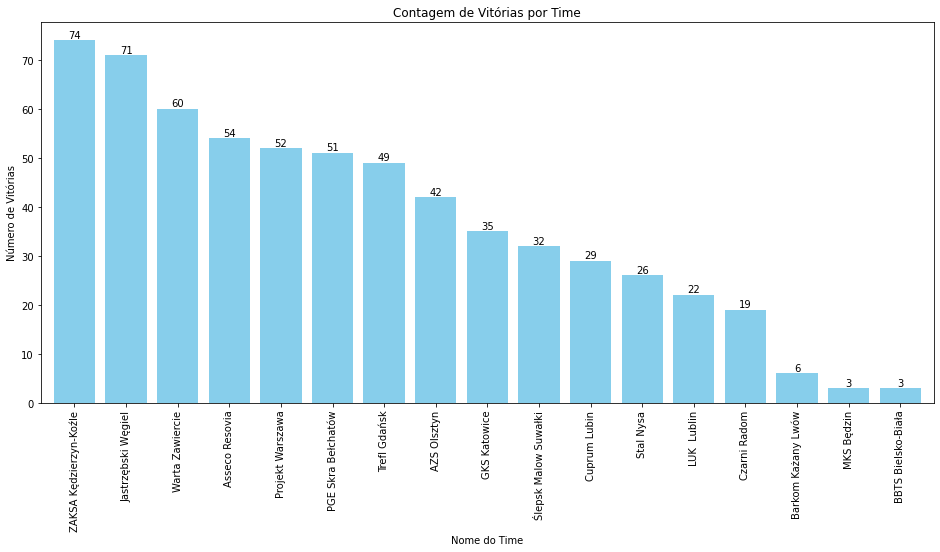

In [427]:
# Contar o número de vitórias para cada time
contagem_vitorias_por_time = df['Nome_Time_Vencedor'].value_counts()

# Criar um gráfico de barras com rótulos de dados e largura ajustada
fig, ax = plt.subplots(figsize=(16, 7))  # Ajustar o tamanho do gráfico
contagem_vitorias_por_time.plot(kind='bar', color='skyblue', ax=ax, width=0.8)  # Ajustar a largura das barras

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(contagem_vitorias_por_time):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Contagem de Vitórias por Time')
plt.xlabel('Nome do Time')
plt.ylabel('Número de Vitórias')

plt.show()

## MÉDIA DE PERCENTUAL DE BLOQUEIO POR TIME

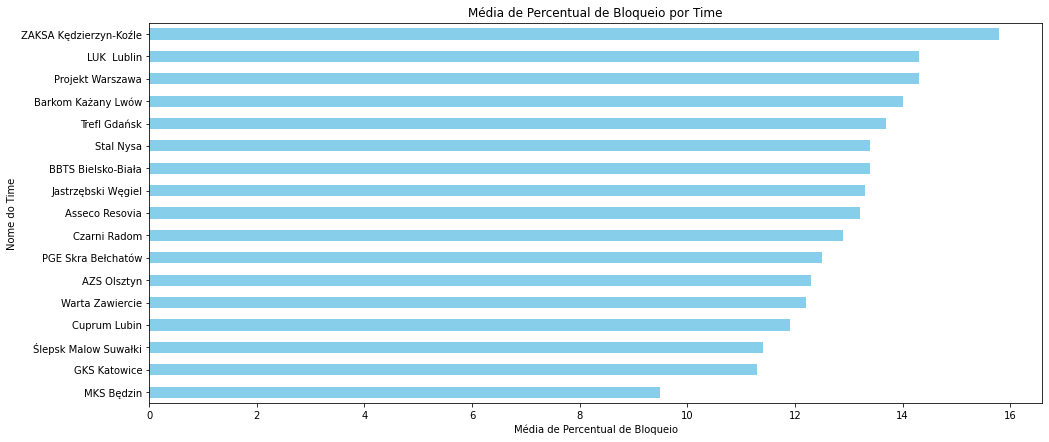

In [428]:
# Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
percentual_bloqueio = pd.concat([df['T1_Perc_Bloqueio'], df['T2_Perc_Bloqueio']])

# Calcular a média para cada time
media_bloqueio_por_time = percentual_bloqueio.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# Criar um gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(16, 7))
media_bloqueio_por_time.sort_values().plot(kind='barh', color='skyblue', ax=ax)

# # Adicionar rótulos de dados acima das barras
# for i, v in enumerate(media_por_time):
#     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Média de Percentual de Bloqueio por Time')
plt.xlabel('Média de Percentual de Bloqueio')
plt.ylabel('Nome do Time')

# Exibir o gráfico
plt.show()

## MÉDIA DE PERCENTUAL DE EFICIÊNCIA DE SAQUE POR TIME

#### Aqui foi levado em consideração o seguinte cálculo: (Total de Aces - Total de Saques Errados) / Total de Saques + Total de Pontos marcados em um contra ataque do proprio saque

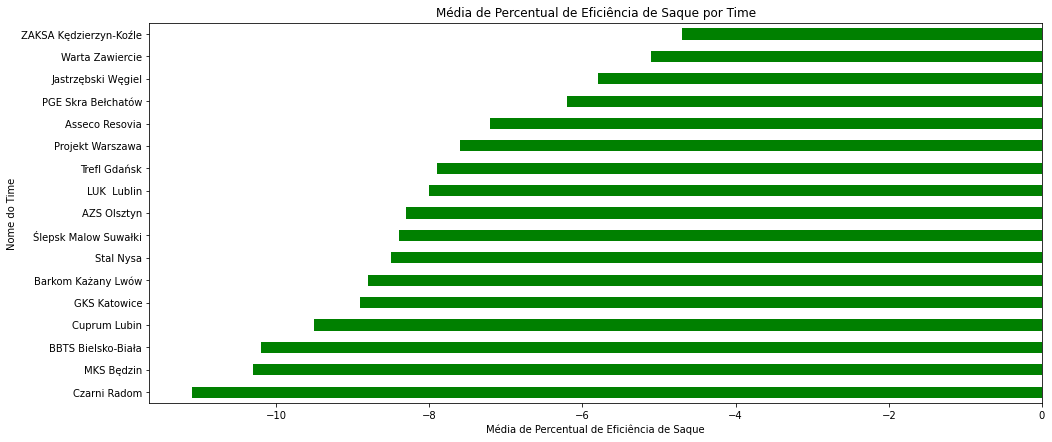

In [429]:
# Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
percentual_saque = pd.concat([df['T1_PercEficienciaSaque'], df['T2_PercEficienciaSaque']])

# Calcular a média para cada time
media_eficiencia_saque_por_time = percentual_saque.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# Criar um gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(16, 7))
media_eficiencia_saque_por_time.sort_values().plot(kind='barh', color='green', ax=ax)

# # Adicionar rótulos de dados acima das barras
# for i, v in enumerate(media_por_time):
#     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Média de Percentual de Eficiência de Saque por Time')
plt.xlabel('Média de Percentual de Eficiência de Saque')
plt.ylabel('Nome do Time')

# Exibir o gráfico
plt.show()

In [430]:
df_relacao = pd.DataFrame({
    'Contagem_Vitorias': contagem_vitorias_por_time,
    'Media_Bloqueio': media_bloqueio_por_time, 
    'Media_Saque': media_eficiencia_saque_por_time
})

df_relacao = df_relacao.sort_values(by=[
    'Contagem_Vitorias', 
    'Media_Bloqueio',
    'Media_Saque'
], ascending=[False, False, False])

df_relacao

,Contagem_Vitorias,Media_Bloqueio,Media_Saque
ZAKSA Kędzierzyn-Koźle,74,15.8,-4.7
Jastrzębski Węgiel,71,13.3,-5.8
Warta Zawiercie,60,12.2,-5.1
Asseco Resovia,54,13.2,-7.2
Projekt Warszawa,52,14.3,-7.6
PGE Skra Bełchatów,51,12.5,-6.2
Trefl Gdańsk,49,13.7,-7.9
AZS Olsztyn,42,12.3,-8.3
GKS Katowice,35,11.3,-8.9
Ślepsk Malow Suwałki,32,11.4,-8.4


In [438]:
# Agrupando por ano e time, calculando médias e contagem de vitórias
resultados = df.groupby(['Ano', 'T1']).agg({
    'T1_PercEficienciaSaque': 'mean',
    'T1_Perc_Bloqueio': 'mean',
    'Nome_Time_Vencedor': 'count'
}).reset_index()

# Renomeando as colunas
resultados = resultados.rename(columns={
    'T1_PercEficienciaSaque': 'media_saques',
    'T1_Perc_Bloqueio': 'media_bloqueio',
    'Nome_Time_Vencedor': 'contagem_vitorias'
})

# Exibindo os resultados
resultados


,Ano,T1,media_saques,media_bloqueio,contagem_vitorias
0,2020,AZS Olsztyn,-8.142857,11.142857,7
1,2020,Asseco Resovia,-5.285714,7.528571,7
2,2020,Cuprum Lubin,-10.250000,14.150000,8
3,2020,Czarni Radom,-7.000000,14.425000,8
4,2020,GKS Katowice,-11.666667,9.150000,6
...,...,...,...,...,...
56,2023,Stal Nysa,-7.000000,13.433333,3
57,2023,Trefl Gdańsk,-7.500000,14.075000,4
58,2023,Warta Zawiercie,-6.000000,14.475000,4
59,2023,ZAKSA Kędzierzyn-Koźle,0.000000,12.800000,4


### GRÁFICO DISPERSÃO RELAÇÃO ENTRE MÉDIA DE BLOQUEIO E VITÓRIAS POR TIME

In [ ]:
# Criar um gráfico de dispersão
plt.figure(figsize=(16, 7))
plt.scatter(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'], color='skyblue')

# Adicionar rótulos aos pontos
for i, nome_time in enumerate(df_relacao.index):
    plt.annotate(nome_time, (df_relacao['Media_Bloqueio'][i], df_relacao['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Configurar o título e os rótulos do eixo
plt.title('Relação entre Média de Bloqueios e Número de Vitórias')
plt.xlabel('Média de Bloqueios')
plt.ylabel('Número de Vitórias')

# Exibir o gráfico
plt.show()


In [ ]:
# Calcular o coeficiente de correlação
coeficiente_pearson = scipy.stats.pearsonr(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'])[0]
print(f'Coeficiente de Pearson = {coeficiente_pearson}')

```Uma correlação de 0.36 indica uma correlação positiva moderada entre as variáveis Media_Bloqueio e Contagem_Vitorias. Isso significa que, em média, à medida que a Media_Bloqueio aumenta, a Contagem_Vitorias também tende a aumentar, mas não de forma perfeita. A magnitude da correlação (0.36) sugere que a relação não é extremamente forte, mas ainda assim existe uma tendência positiva.```

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE EFICIENCIA DO SAQUE E VITÓRIAS POR TIME

In [ ]:
# Criar um gráfico de dispersão
plt.figure(figsize=(16, 7))
plt.scatter(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'], color='green')

# Adicionar rótulos aos pontos
for i, nome_time in enumerate(df_relacao_saque.index):
    plt.annotate(nome_time, (df_relacao_saque['Media_Saque'][i], df_relacao_saque['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Configurar o título e os rótulos do eixo
plt.title('Relação entre Média de Eficiência de Saques e Número de Vitórias')
plt.xlabel('Média de Eficiência de Saques')
plt.ylabel('Número de Vitórias')

# Exibir o gráfico
plt.show()


In [ ]:
# Calcular o coeficiente de correlação
coeficiente_pearson_saque = scipy.stats.pearsonr(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'])[0]
print(f'Coeficiente de Pearson = {coeficiente_pearson_saque}')

```Ocoeficiente de correlação de Pearson é 0,8735802344182835. Esse valor é próximo de 1, o que indica uma correlação linear positiva forte entre as duas variáveis. Em outras palavras, as duas variáveis aumentam ou diminuem juntas.```